### **TWITTER** **SENTIMENTAL** **ANALYSIS** 

In [44]:
# Install Libraries

!pip install textblob
!pip install tweepy

In [45]:
# Import Libraries and modules

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
! pip install nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
#Authentication

consumerKey = 'Enter Cosumer key here'
consumerSecret = 'Enter Consumer Secret here'
accessToken = 'Enter Access Token here'
accessTokenSecret = 'Enter Access Token Secret here'

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [48]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

Keyword = input("Please enter keyword or hashtag to search: ")
Nooftweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=Keyword).items(Nooftweet)
Positive  = 0
Negative = 0
Neutral = 0
Polarity = 0
tweet_list = []
Neutral_list = []
Negative_list = []
Positive_list = []

for tweet in tweets:
    
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    Neg = score['neg']
    Neu = score['neu']
    Pos = score['pos']
    comp = score['compound']
    Polarity += analysis.sentiment.polarity
    
    if Neg > Pos:
        Negative_list.append(tweet.text)
        Negative += 1

    elif Pos > Neg:
        Positive_list.append(tweet.text)
        Positive += 1
    
    elif Pos == Neg:
        Neutral_list.append(tweet.text)
        Neutral += 1

Positive = percentage(Positive, Nooftweet)
Negative = percentage(Negative, Nooftweet)
Neutral = percentage(Neutral, Nooftweet)
Polarity = percentage(Polarity, Nooftweet)
Positive = format(Positive, '.1f')
Negative = format(Negative, '.1f')
Neutral = format(Neutral, '.1f')

Please enter keyword or hashtag to search: tesla
Please enter how many tweets to analyze: 1000


In [49]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
Neutral_list = pd.DataFrame(Neutral_list)
Negative_list = pd.DataFrame(Negative_list)
Positive_list = pd.DataFrame(Positive_list)
print("Total tweets: ",len(tweet_list))
print("Positive tweets: ",len(Positive_list))
print("Negative tweets: ", len(Negative_list))
print("Neutral tweets: ",len(Neutral_list))

Total tweets:  1000
Positive tweets:  353
Negative tweets:  87
Neutral tweets:  560


In [50]:
tweet_list

,0
0,RT @greg16676935420: Happy 6 month anniversary...
1,RT @nubeamco: 🤣🤣🤣\n정동영 유니폼 아니냐는 김성민님 ㅎㅎ https...
2,RT @iAmMuzicKing: It’s crazy. @Tesla will prob...
3,RT @special1004: #이특의특슬라#teuksla#tesla#총리뷰#테슬라...
4,RT @elonmusk: @SamTwits I hope they’re able to...
...,...
995,RT @KoreanTesla: @brianchoi_tesla 정말 그런 것 같습니다...
996,@GuyRuff1 @LithiumAmericas @MillennialLi Kind ...
997,"RT @xxteukie: the red, white, and blue details..."
998,"Rivian Automotive, an electric vehicle company..."


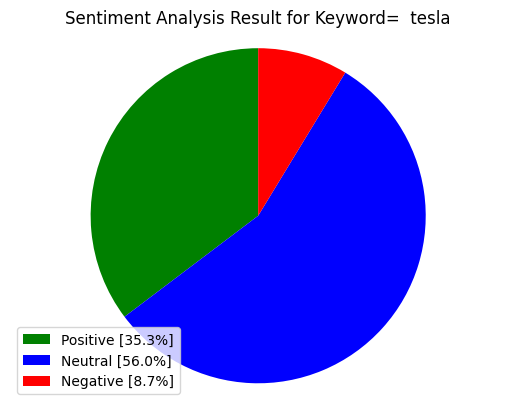

In [51]:
#Creating PieCart

labels = ['Positive ['+str(Positive)+'%]' , 'Neutral ['+str(Neutral)+'%]','Negative ['+str(Negative)+'%]']
sizes = [Positive, Neutral, Negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Keyword=  "+Keyword+"" )
plt.axis('equal')
plt.show()

In [52]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [53]:
tw_list = pd.DataFrame(tweet_list)
tw_list["Text"] = tw_list[0]
tw_list

,0,Text
0,RT @greg16676935420: Happy 6 month anniversary...,RT @greg16676935420: Happy 6 month anniversary...
1,RT @nubeamco: 🤣🤣🤣\n정동영 유니폼 아니냐는 김성민님 ㅎㅎ https...,RT @nubeamco: 🤣🤣🤣\n정동영 유니폼 아니냐는 김성민님 ㅎㅎ https...
2,RT @iAmMuzicKing: It’s crazy. @Tesla will prob...,RT @iAmMuzicKing: It’s crazy. @Tesla will prob...
3,RT @special1004: #이특의특슬라#teuksla#tesla#총리뷰#테슬라...,RT @special1004: #이특의특슬라#teuksla#tesla#총리뷰#테슬라...
4,RT @elonmusk: @SamTwits I hope they’re able to...,RT @elonmusk: @SamTwits I hope they’re able to...
...,...,...
994,@MarioBellotary @sans_crita @TESLA_CREADOR @GA...,@MarioBellotary @sans_crita @TESLA_CREADOR @GA...
995,RT @KoreanTesla: @brianchoi_tesla 정말 그런 것 같습니다...,RT @KoreanTesla: @brianchoi_tesla 정말 그런 것 같습니다...
996,@GuyRuff1 @LithiumAmericas @MillennialLi Kind ...,@GuyRuff1 @LithiumAmericas @MillennialLi Kind ...
998,"Rivian Automotive, an electric vehicle company...","Rivian Automotive, an electric vehicle company..."


In [54]:
tweet_list

,0,Text
0,RT @greg16676935420: Happy 6 month anniversary...,RT @greg16676935420: Happy 6 month anniversary...
1,RT @nubeamco: 🤣🤣🤣\n정동영 유니폼 아니냐는 김성민님 ㅎㅎ https...,RT @nubeamco: 🤣🤣🤣\n정동영 유니폼 아니냐는 김성민님 ㅎㅎ https...
2,RT @iAmMuzicKing: It’s crazy. @Tesla will prob...,RT @iAmMuzicKing: It’s crazy. @Tesla will prob...
3,RT @special1004: #이특의특슬라#teuksla#tesla#총리뷰#테슬라...,RT @special1004: #이특의특슬라#teuksla#tesla#총리뷰#테슬라...
4,RT @elonmusk: @SamTwits I hope they’re able to...,RT @elonmusk: @SamTwits I hope they’re able to...
...,...,...
994,@MarioBellotary @sans_crita @TESLA_CREADOR @GA...,@MarioBellotary @sans_crita @TESLA_CREADOR @GA...
995,RT @KoreanTesla: @brianchoi_tesla 정말 그런 것 같습니다...,RT @KoreanTesla: @brianchoi_tesla 정말 그런 것 같습니다...
996,@GuyRuff1 @LithiumAmericas @MillennialLi Kind ...,@GuyRuff1 @LithiumAmericas @MillennialLi Kind ...
998,"Rivian Automotive, an electric vehicle company...","Rivian Automotive, an electric vehicle company..."


In [56]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["Text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["Text"] = tw_list.Text.map(remove_rt).map(rt)
tw_list["Text"] = tw_list.Text.str.lower()
tw_list.head(10)

,0,Text
0,RT @greg16676935420: Happy 6 month anniversary...,happy 6 month anniversary of elon asking if t...
1,RT @nubeamco: 🤣🤣🤣\n정동영 유니폼 아니냐는 김성민님 ㅎㅎ https...,
2,RT @iAmMuzicKing: It’s crazy. @Tesla will prob...,it s crazy will probably be like 10 000 a...
3,RT @special1004: #이특의특슬라#teuksla#tesla#총리뷰#테슬라...,teuksla tesla 5
4,RT @elonmusk: @SamTwits I hope they’re able to...,i hope they re able to achieve high product...
5,@LilyDAmbrosioMP @NEOEN_AU @Tesla @AEMO_Energy...,au energy such an important initiative...
6,RT @Auto_Porn: Tesla Roadster 🥵 https://t.co/R...,tesla roadster
7,"Whenever Elon is on,market is bomb.\n@elonmusk...",whenever elon is on market is bomb bus...
8,Do you realize that #tesla style #carstereo ha...,do you realize that tesla style carstereo ha...
9,Tesla et surtout le Model 3 inquiète le PDG de...,tesla et surtout le model 3 inqui te le pdg de...


In [57]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['Polarity', 'subjectivity']] = tw_list['Text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['Text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    Neg = score['neg']
    Neu = score['neu']
    Pos = score['pos']
    comp = score['compound']
    if Neg > Pos:
        tw_list.loc[index, 'sentiment'] = "Negative"
    elif Pos > Neg:
        tw_list.loc[index, 'sentiment'] = "Positive"
    else:
        tw_list.loc[index, 'sentiment'] = "Neutral"
    tw_list.loc[index, 'neg'] = Neg
    tw_list.loc[index, 'neu'] = Neu
    tw_list.loc[index, 'pos'] = Pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,Text,Polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @greg16676935420: Happy 6 month anniversary...,happy 6 month anniversary of elon asking if t...,0.800000,1.000000,Positive,0.000,0.588,0.412,0.7430
1,RT @nubeamco: 🤣🤣🤣\n정동영 유니폼 아니냐는 김성민님 ㅎㅎ https...,,0.000000,0.000000,Neutral,0.000,0.000,0.000,0.0000
2,RT @iAmMuzicKing: It’s crazy. @Tesla will prob...,it s crazy will probably be like 10 000 a...,-0.400000,0.500000,Positive,0.149,0.559,0.292,0.3182
3,RT @special1004: #이특의특슬라#teuksla#tesla#총리뷰#테슬라...,teuksla tesla 5,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000
4,RT @elonmusk: @SamTwits I hope they’re able to...,i hope they re able to achieve high product...,0.336667,0.605000,Positive,0.000,0.769,0.231,0.6908
5,@LilyDAmbrosioMP @NEOEN_AU @Tesla @AEMO_Energy...,au energy such an important initiative...,0.200000,0.750000,Positive,0.000,0.698,0.302,0.4404
6,RT @Auto_Porn: Tesla Roadster 🥵 https://t.co/R...,tesla roadster,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000
7,"Whenever Elon is on,market is bomb.\n@elonmusk...",whenever elon is on market is bomb bus...,0.000000,0.000000,Negative,0.338,0.662,0.000,-0.6249
8,Do you realize that #tesla style #carstereo ha...,do you realize that tesla style carstereo ha...,0.566667,0.616667,Positive,0.000,0.665,0.335,0.7604
9,Tesla et surtout le Model 3 inquiète le PDG de...,tesla et surtout le model 3 inqui te le pdg de...,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000


In [58]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_Negative = tw_list[tw_list["sentiment"]=="Negative"]
tw_list_Positive = tw_list[tw_list["sentiment"]=="Positive"]
tw_list_Neutral = tw_list[tw_list["sentiment"]=="Neutral"]

In [59]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [60]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
Neutral,383,53.72
Positive,242,33.94
Negative,88,12.34


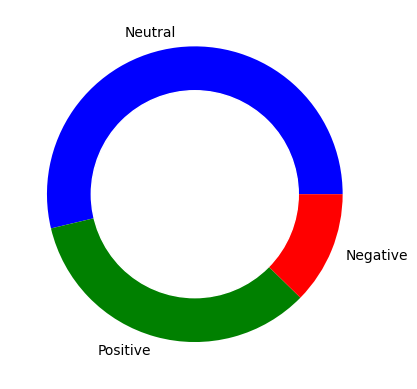

In [62]:
# create data for Pie Chart

pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['blue','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [67]:
#Function to Create Wordcloud

def create_wordcloud(Text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(Text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


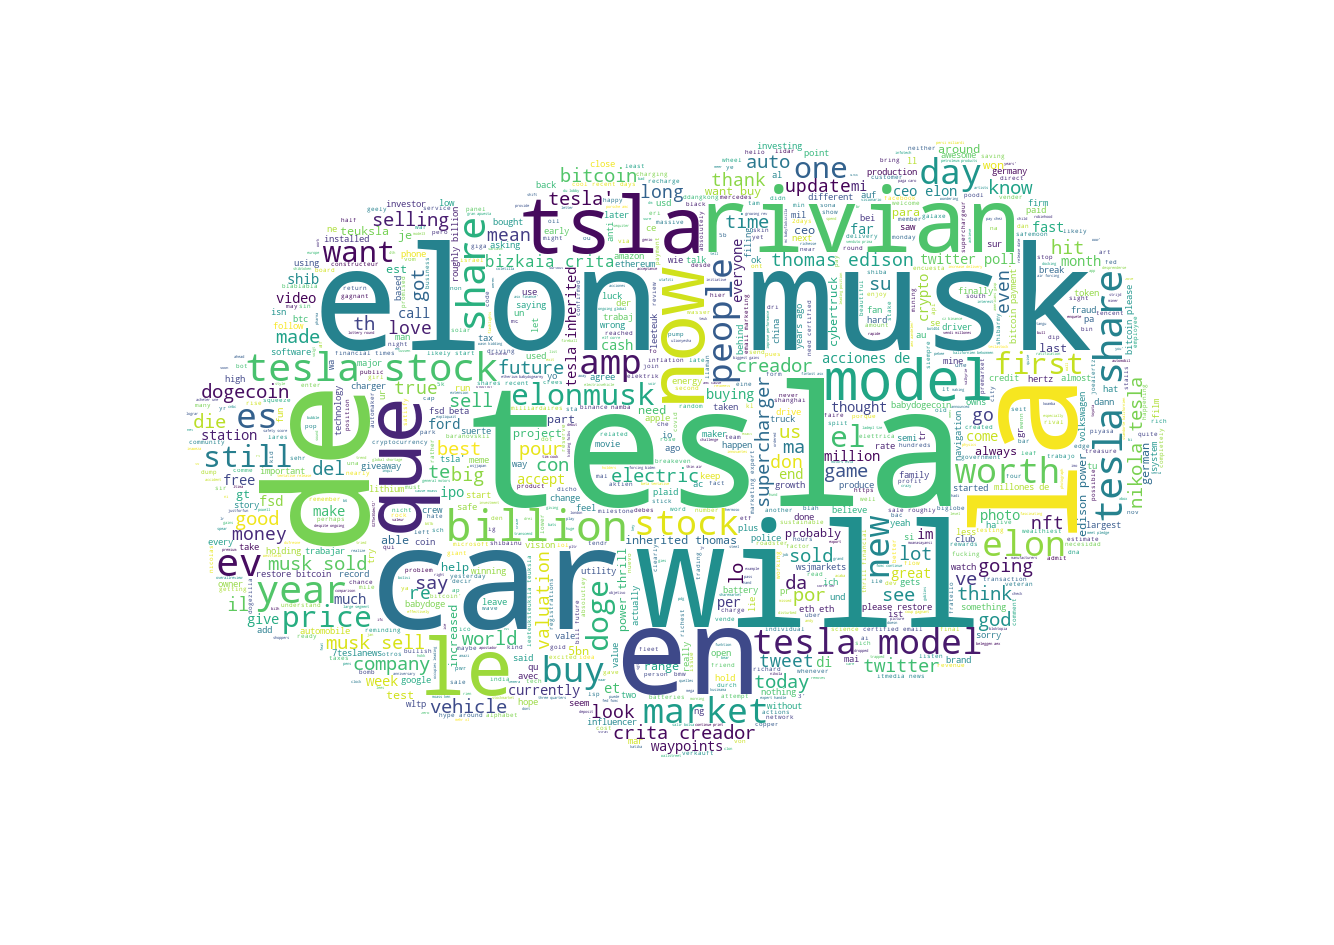

In [68]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["Text"].values)

Word Cloud Saved Successfully


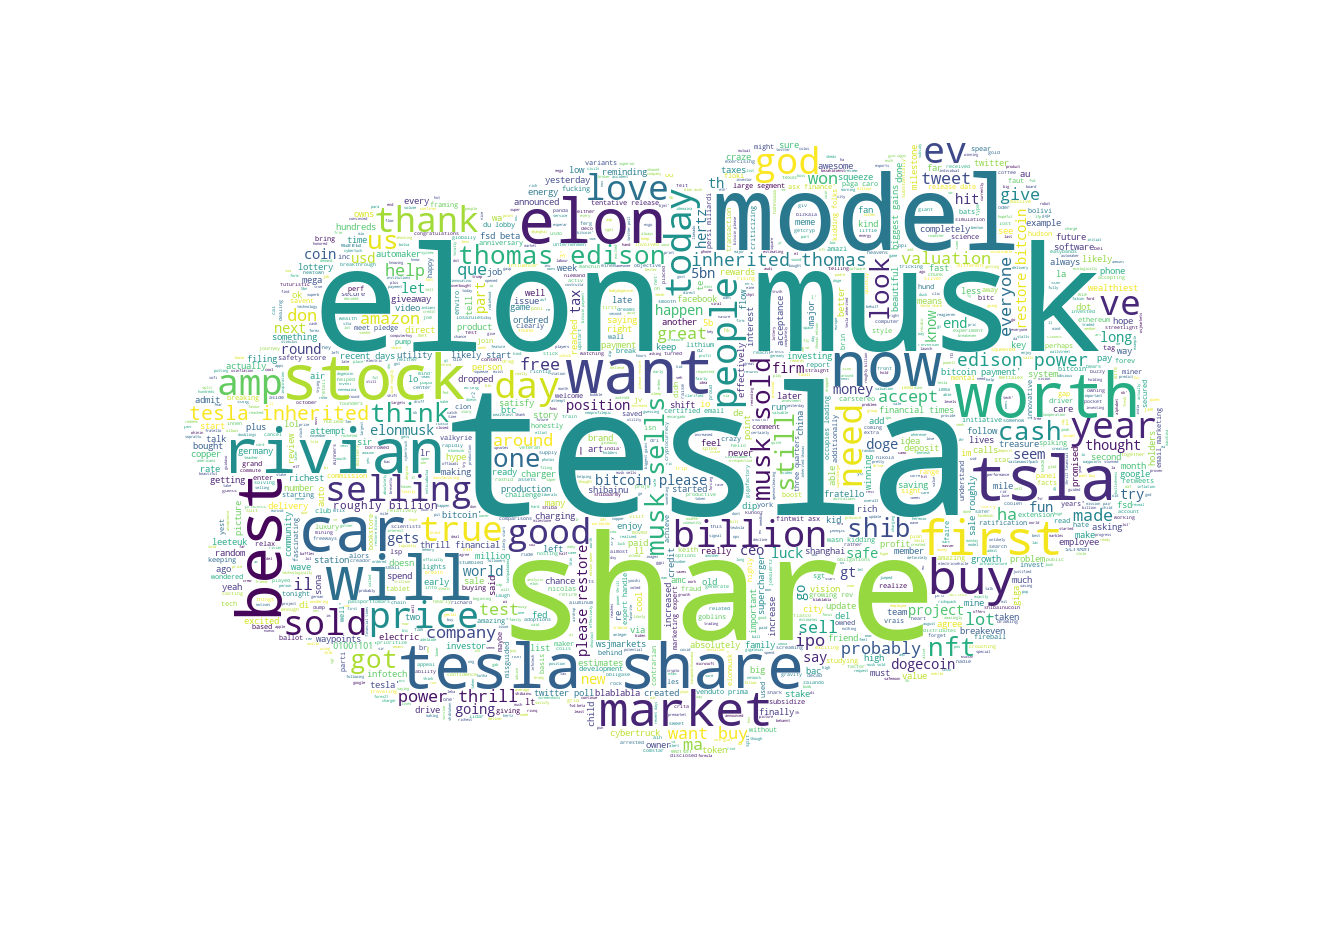

In [69]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_Positive["Text"].values)

Word Cloud Saved Successfully


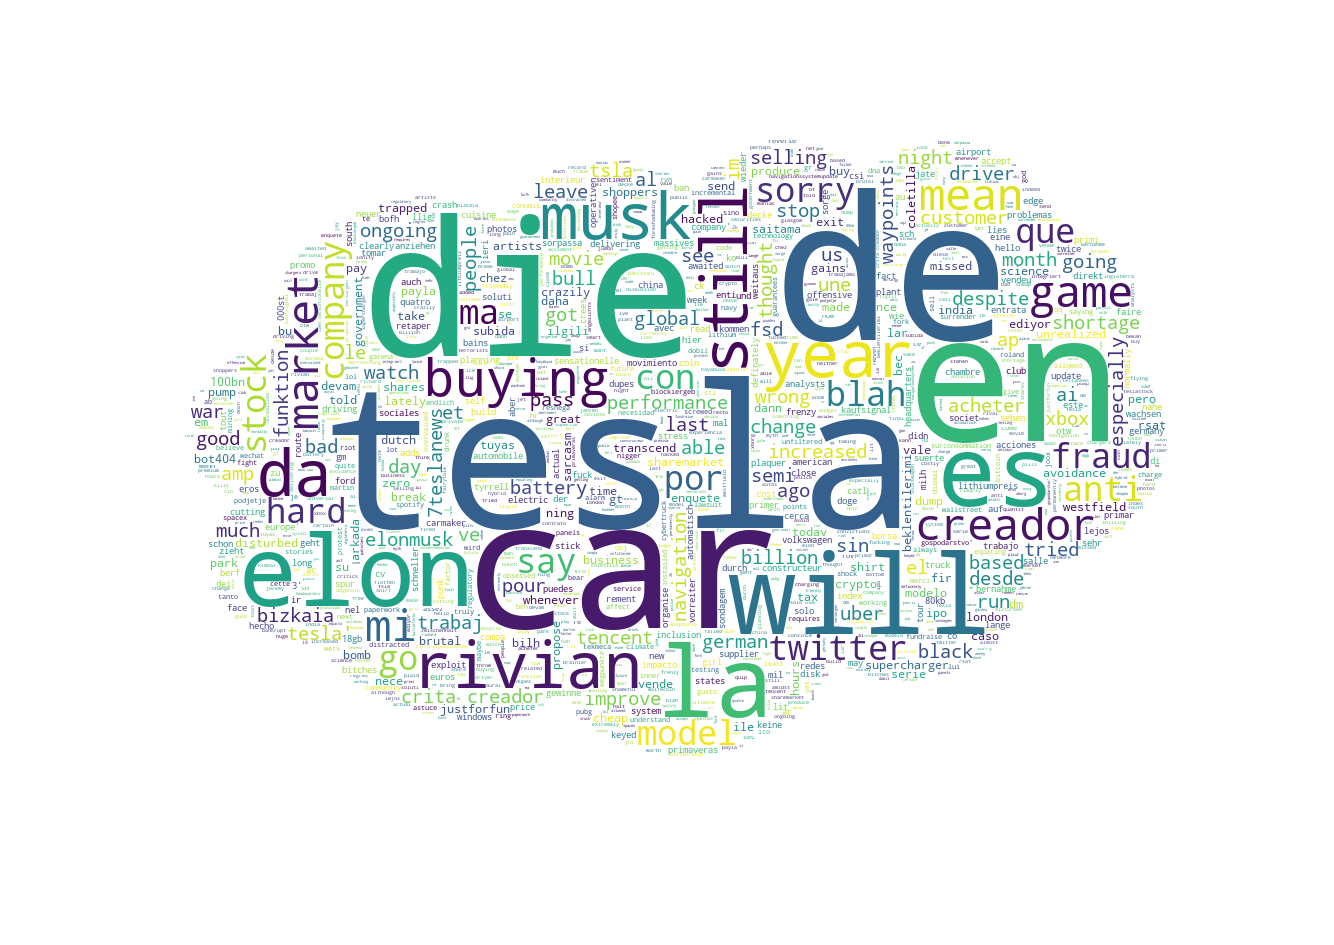

In [70]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_Negative["Text"].values)

Word Cloud Saved Successfully


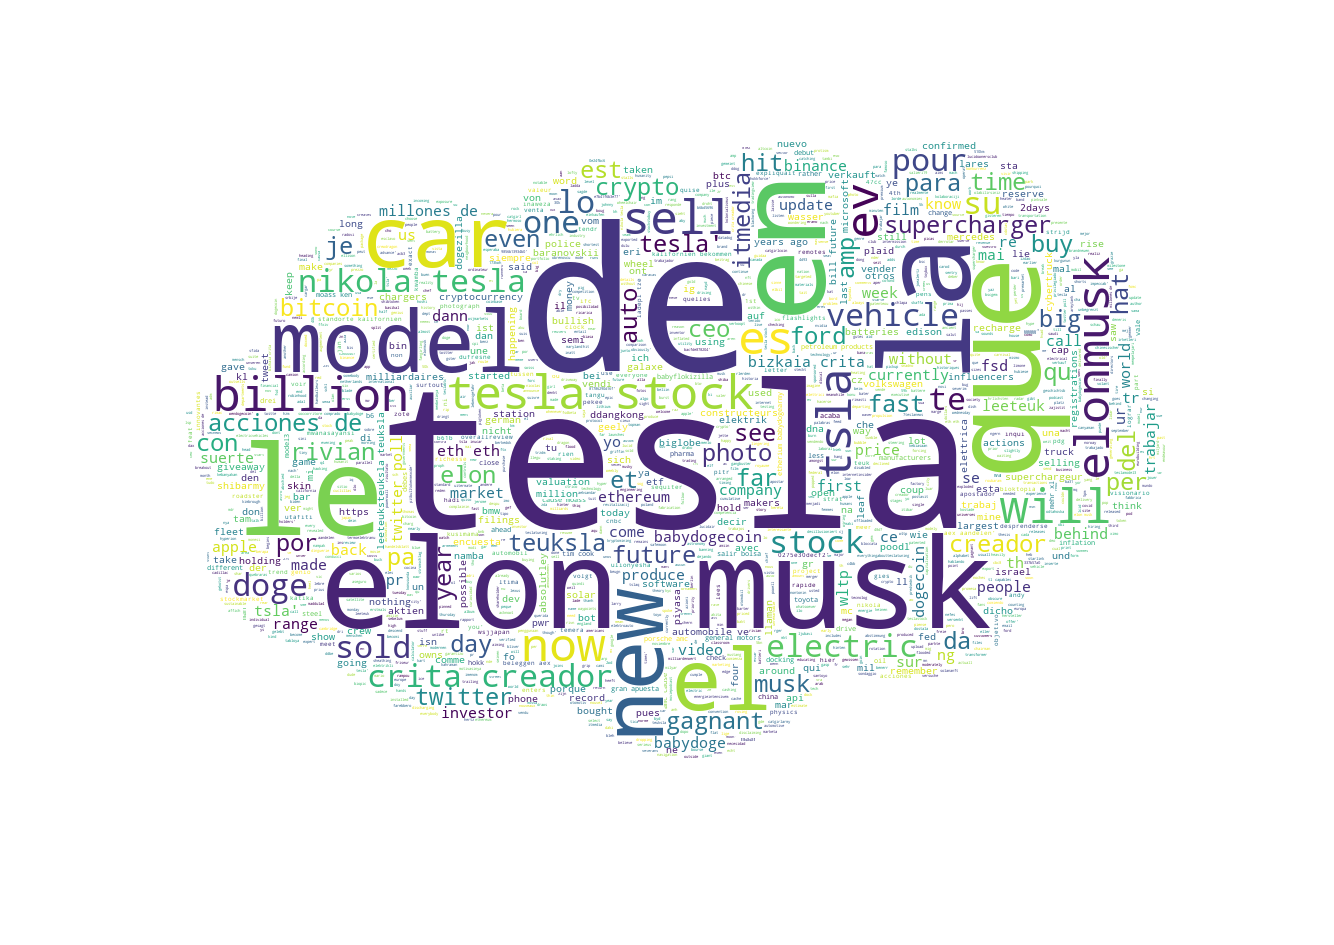

In [71]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_Neutral["Text"].values)

In [72]:
#Calculating tweet's lenght and word count

tw_list['text_len'] = tw_list['Text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['Text'].apply(lambda x: len(str(x).split()))

In [73]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
Negative,94.00
Neutral,74.10
Positive,94.31


In [74]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
Negative,16.25
Neutral,9.95
Positive,16.90


In [77]:
#Removing Punctuation

def remove_punct(Text):
    Text  = "".join([char for char in Text if char not in string.punctuation])
    Text = re.sub('[0-9]+', '', Text)
    return Text

tw_list['punct'] = tw_list['Text'].apply(lambda x: remove_punct(x))

In [78]:
#Appliyng tokenization

def tokenization(Text):
    Text = re.split('\W+', Text)
    return Text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
#Removing stopwords

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(Text):
    Text = [word for word in Text if word not in stopword]
    return Text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [82]:
#Appliyng Stemmer

ps = nltk.PorterStemmer()

def stemming(Text):
    Text = [ps.stem(word) for word in Text]
    return Text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [83]:
#Cleaning Text

def clean_text(Text):
    Text_lc = "".join([word.lower() for word in Text if word not in string.punctuation]) # remove puntuation
    Text_rc = re.sub('[0-9]+', '', Text_lc)
    tokens = re.split('\W+', Text_rc)    # tokenization
    Text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return Text

In [84]:
tw_list.head()

,0,Text,Polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @greg16676935420: Happy 6 month anniversary...,happy 6 month anniversary of elon asking if t...,0.800000,1.000,Positive,0.000,0.588,0.412,0.7430,75,12,happy month anniversary of elon asking if te...,"[, happy, month, anniversary, of, elon, asking...","[, happy, month, anniversary, elon, asking, te...","[, happi, month, anniversari, elon, ask, tesla..."
1,RT @nubeamco: 🤣🤣🤣\n정동영 유니폼 아니냐는 김성민님 ㅎㅎ https...,,0.000000,0.000,Neutral,0.000,0.000,0.000,0.0000,28,0,,"[, ]","[, ]","[, ]"
2,RT @iAmMuzicKing: It’s crazy. @Tesla will prob...,it s crazy will probably be like 10 000 a...,-0.400000,0.500,Positive,0.149,0.559,0.292,0.3182,67,15,it s crazy will probably be like a shar...,"[, it, s, crazy, will, probably, be, like, a, ...","[, crazy, probably, like, share, years]","[, crazi, probabl, like, share, year]"
3,RT @special1004: #이특의특슬라#teuksla#tesla#총리뷰#테슬라...,teuksla tesla 5,0.000000,0.000,Neutral,0.000,1.000,0.000,0.0000,46,3,teuksla tesla,"[, teuksla, tesla, ]","[, teuksla, tesla, ]","[, teuksla, tesla, ]"
4,RT @elonmusk: @SamTwits I hope they’re able to...,i hope they re able to achieve high product...,0.336667,0.605,Positive,0.000,0.769,0.231,0.6908,123,22,i hope they re able to achieve high product...,"[, i, hope, they, re, able, to, achieve, high,...","[, hope, able, achieve, high, production, amp,...","[, hope, abl, achiev, high, product, amp, brea..."


In [86]:
#Appliyng Countvectorizer

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['Text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

713 Number of reviews has 2475 words


In [87]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aan,aandelen,ab,aber,abi,abil,abl,abschi,absolut,absolutley,abstimmung,ac,acaba,acb,accept,accid,accion,accord,account,achet,achiev,acknowl,across,action,activ,actual,ad,ada,adal,add,addit,adelaid,adm,admit,adopt,adri,advanc,advic,...,wow,wrong,wsjjapan,wsjmarket,www,x,xborg,xbox,ximo,xl,ya,yang,yaz,ye,yeah,year,yest,yesterday,yet,yla,yo,yooshi,yor,york,youtub,yoyo,yr,ys,zajistit,zalando,zda,ze,zero,zieht,zijn,zn,zote,zr,zu,zwischenhalt
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
# Most Used Words

count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
tesla,454
elon,82
musk,75
de,65
share,41
model,41
stock,36
car,35
sell,33
la,30
